# Autoencoder

Source: https://www.youtube.com/watch?v=LjRvMUk59PI
https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import keras
from tensorflow.keras.layers import Input, Dense
from keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MNIST Dataset

In [6]:
# Tensorflow code for loading in data
(x_train, _), (x_test, _) = mnist.load_data()
# Normalizing 32bit values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape, x_test.shape)
print('We want to combine the 2nd and third dimensions to get', 28 * 28, 'for our input space of the neural network')
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.reshape(len(x_train), x_train.shape[1]**2)
x_test = x_test.reshape(len(x_test), x_test.shape[1]**2)
print(x_train.shape)
print(x_test.shape)
print(x_train)

(60000, 28, 28) (10000, 28, 28)
We want to combine the 2nd and third dimensions to get 784 for our input space of the neural network
(60000, 784)
(10000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creating the Architecture of an Autoencoder

In [39]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_28 (Dense)            (None, 32)                25120     
                                                                 
 dense_29 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2852 - accuracy: 0.0121 - mse: 0.0692 - val_loss: 0.1970 - val_accuracy: 0.0097 - val_mse: 0.0398
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1777 - accuracy: 0.0115 - mse: 0.0338 - val_loss: 0.1606 - val_accuracy: 0.0097 - val_mse: 0.0284
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1524 - accuracy: 0.0110 - mse: 0.0257 - val_loss: 0.1427 - val_accuracy: 0.0089 - val_mse: 0.0225
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1384 - accuracy: 0.0103 - mse: 0.0211 - val_loss: 0.1316 - val_accuracy: 0.0080 - val_mse: 0.0189
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1289 - accuracy: 0.0109 - mse: 0.0179 - val_loss: 0.1237 - val_accuracy: 0.0095 - val_mse: 0.0162
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1222 - accuracy: 0.0110 - mse: 0.0157 - val_loss: 0.11

In [41]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

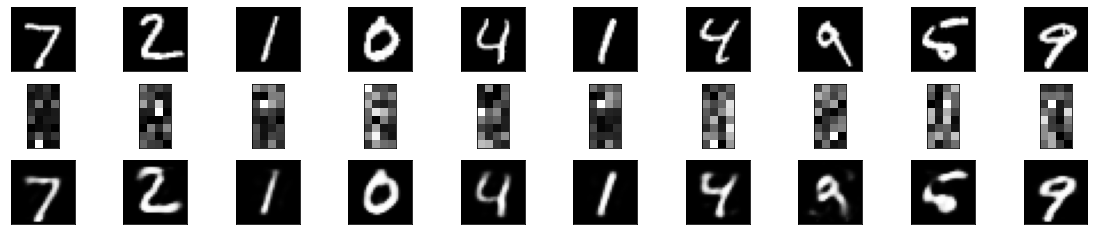

In [42]:

n = 10  # How many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, 20, i + 1 + 2 * 20)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()